# RNNs for Timeseries Analysis
#  Long Short-Term Memory

In [2]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



# Load dataset

In [3]:
dataset = pd.read_csv("C:/Users/HP/Downloads/GDP.csv", header=0, parse_dates=[0], index_col=0)
dataset.head()

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


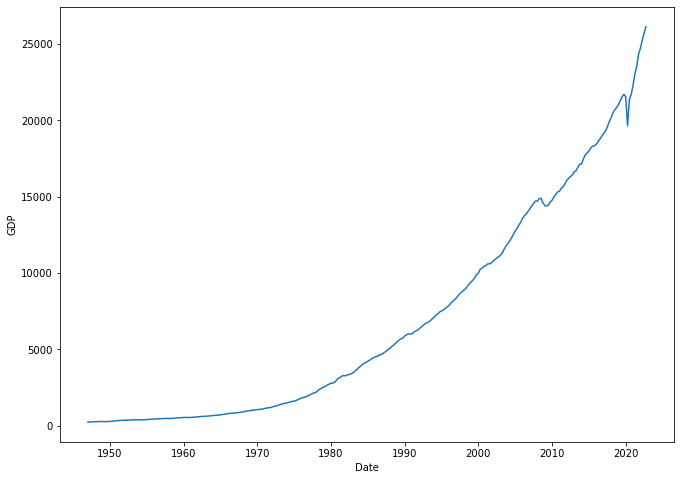

In [4]:
plt.plot(dataset['GDP'])
plt.xlabel('Date')
plt.ylabel('GDP');
plt.gcf().set_size_inches(11,8)

# Calculate the QoQ growth
The outputs of a SimpleRNN are generated by an tanh function. Here we limit the values of our timeseries to be within [-1, 1] to avoid numerical issues. This also has the added advantage of making the timeseries (relatively) stationary

In [5]:
dataset['diff'] = 0
series = dataset['GDP'].pct_change().dropna().values.reshape(-1,1)
dataset.loc[1:, 'diff']=series

C:\Users\HP\AppData\Local\Temp\ipykernel_10852\4092678654.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[1:, 'diff']=series


In [6]:
dataset

,GDP,diff
DATE,,
1947-01-01,243.164,0.000000
1947-04-01,245.968,0.011531
1947-07-01,249.585,0.014705
1947-10-01,259.745,0.040708
1948-01-01,265.742,0.023088
...,...,...
2021-10-01,24349.121,0.033915
2022-01-01,24740.480,0.016073
2022-04-01,25248.476,0.020533


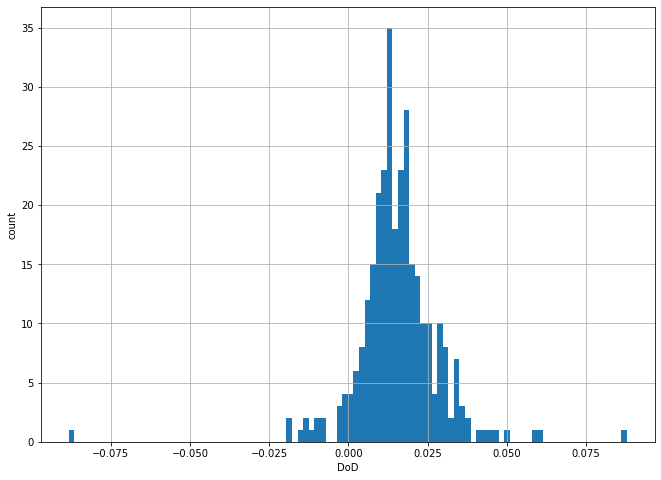

In [7]:
dataset['diff'].hist(bins=100)
plt.xlabel('DoD')
plt.ylabel('count')
plt.gcf().set_size_inches(11, 8)

In [8]:
series.reshape(-1, 1)

array([[ 1.15313122e-02],
       [ 1.47051649e-02],
       [ 4.07075746e-02],
       [ 2.30880286e-02],
       [ 2.56828051e-02],
       [ 2.43206258e-02],
       [ 4.19060445e-03],
       [-1.90179979e-02],
       [-1.33910716e-02],
       [ 5.66793563e-03],
       [-8.28908457e-03],
       [ 3.76939478e-02],
       [ 3.40243850e-02],
       [ 6.11950424e-02],
       [ 3.82667052e-02],
       [ 5.01804998e-02],
       [ 2.40773810e-02],
       [ 2.12008486e-02],
       [ 1.36403091e-02],
       [ 1.02252245e-02],
       [ 3.36279251e-03],
       [ 1.84776888e-02],
       [ 3.56566885e-02],
       [ 1.88229363e-02],
       [ 9.71441827e-03],
       [-1.47543453e-03],
       [-1.32959754e-02],
       [-1.61929684e-03],
       [ 2.01377986e-03],
       [ 1.26255759e-02],
       [ 2.23480547e-02],
       [ 3.33696908e-02],
       [ 2.04782206e-02],
       [ 2.06129072e-02],
       [ 1.59708615e-02],
       [ 6.07194824e-03],
       [ 1.42445866e-02],
       [ 1.16163315e-02],
       [ 2.0

# Training and Testing datasets

In [9]:
values = series.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
values = scaler.fit_transform(values)
X = values[:-1]
y = values[1:]

We'll be using the first 2/3 of the timeseries to train the model and the last 1/3 to evaluate it.

In [10]:
n_points = len(series)
train_points = int(2/3*n_points)+1
X_train, X_test = X[:train_points], X[train_points:]
y_train, y_test = y[:train_points], y[train_points:]
print("We have", len(X_train), "training points and", X_test.shape[0], "testing points")

We have 203 training points and 99 testing points


The SimpleRNN model expects a 3D ([samples, time steps, features]) dataset so we reshape them accordingly

In [11]:


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(203, 1, 1)
(99, 1, 1)


# Define the model architecture.
We'll be using a LSTM . The Dense layer at the end has a linear activation function to aggregate the outputs of all the hidden units.

# LSTM
Let's now try using a slightly more sophisticated architecture

In [18]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [20]:
nb_epoch = 500

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/500
7/7 [==============================] - 3s 4ms/step - loss: 0.0781
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.0671
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0622
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0576
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 11/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 13/500
7/7 [==============================] - 0s 3ms/st

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

dataset['LSTM_train_predict'] = 1
dataset['LSTM_test_predict'] = 1
dataset.loc[1:train_points+1, 'LSTM_train_predict'] = 1+scaler.inverse_transform(y_train_pred)
dataset.loc[train_points+2:, 'LSTM_test_predict'] = 1+scaler.inverse_transform(y_test_pred)

dataset['LSTM_train_predict'] = dataset.iloc[0]['GDP']*dataset['LSTM_train_predict'].cumprod()
dataset['LSTM_test_predict'] = dataset.iloc[train_points+1]['GDP']*dataset['LSTM_test_predict'].cumprod()

4/4 [==============================] - 0s 2ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_10852\4181748509.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[1:train_points+1, 'LSTM_train_predict'] = 1+scaler.inverse_transform(y_train_pred)
C:\Users\HP\AppData\Local\Temp\ipykernel_10852\4181748509.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[train_points+2:, 'LSTM_test_predict'] = 1+scaler.inverse_transform(y_test_pred)


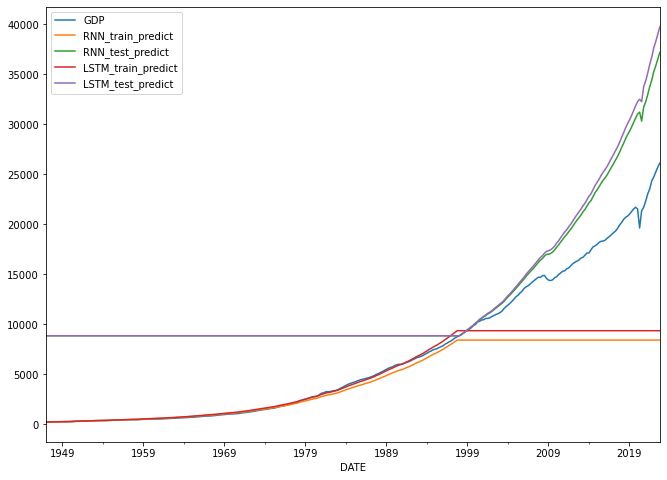

In [22]:
dataset[['GDP', 'RNN_train_predict', 'RNN_test_predict', 'LSTM_train_predict', 'LSTM_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

Multiple timesteps
So far we've been using architectures with just a single timestep. Now we'll see how we can use multiple timesteps (t-1, t) to predict the value at t+1. We'll keep the basic architecture of the system. We still have the raw data in memory, so we don't need to reload it. We just have to be careful when we build the inputs

In [24]:
X2 = np.concatenate([X[0:-4], X[1:-3], X[2:-2], X[3:-1]], axis=1)
y2 = X[4:]

X2_train, X2_test = X2[:train_points], X2[train_points:]
y2_train, y2_test = y2[:train_points], y2[train_points:]

print("We have", X2_train.shape[0], "training points and", X2_test.shape[0], "testing points")

We have 203 training points and 95 testing points


In [26]:


X2_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1], 1)
X2_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1], 1)
print(X2_train.shape)
print(X2_test.shape)

(203, 4, 1)
(95, 4, 1)


In [27]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [28]:
nb_epoch = 500
model.fit(X2_train, y2_train, epochs=nb_epoch, batch_size=12)

Epoch 1/500
17/17 [==============================] - 4s 7ms/step - loss: 0.0486
Epoch 2/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0291
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0193
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 5/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0165
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 7/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 8/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 9/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 10/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 11/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 12/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 13/500
17/17 [=================

In [29]:
y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

dataset['LSTM3_train_predict'] = 1
dataset['LSTM3_test_predict'] = 1
dataset.loc[4:train_points+4, 'LSTM3_train_predict'] = 1+scaler.inverse_transform(y_train_pred)
dataset.loc[train_points+6:, 'LSTM3_test_predict'] = 1+scaler.inverse_transform(y_test_pred)

dataset['LSTM3_train_predict'] = dataset.iloc[0]['GDP']*dataset['LSTM3_train_predict'].cumprod()
dataset['LSTM3_test_predict'] = dataset.iloc[train_points+1]['GDP']*dataset['LSTM3_test_predict'].cumprod()

3/3 [==============================] - 0s 2ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_10852\2833889976.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[4:train_points+4, 'LSTM3_train_predict'] = 1+scaler.inverse_transform(y_train_pred)
C:\Users\HP\AppData\Local\Temp\ipykernel_10852\2833889976.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[train_points+6:, 'LSTM3_test_predict'] = 1+scaler.inverse_transform(y_test_pred)


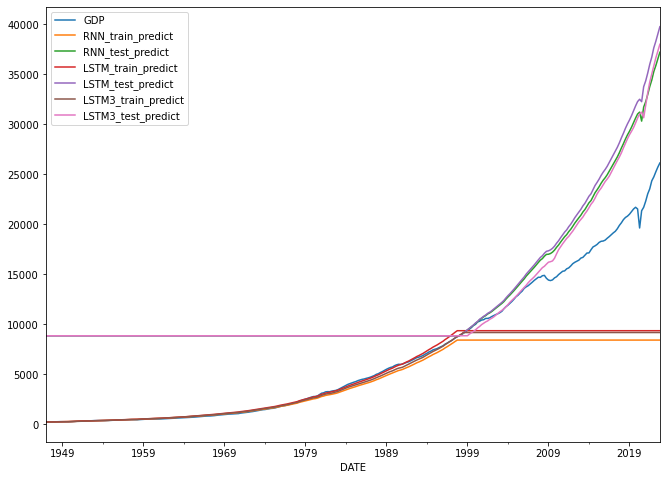

In [30]:
dataset[['GDP', 'RNN_train_predict', 'RNN_test_predict', 
                'LSTM_train_predict', 'LSTM_test_predict', 
                'LSTM3_train_predict', 'LSTM3_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

# GRU

In [32]:
model = Sequential()
model.add(GRU(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4)                 84        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [33]:
nb_epoch = 500

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/500
7/7 [==============================] - 4s 4ms/step - loss: 0.0693
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0624
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0340
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 11/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 13/500
7/7 [==============================] - 0s 3ms/st

4/4 [==============================] - 0s 3ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_10852\3513940365.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[1:train_points+1, 'GRU_train_predict'] = 1+scaler.inverse_transform(y_train_pred)
C:\Users\HP\AppData\Local\Temp\ipykernel_10852\3513940365.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dataset.loc[train_points+2:, 'GRU_test_predict'] = 1+scaler.inverse_transform(y_test_pred)


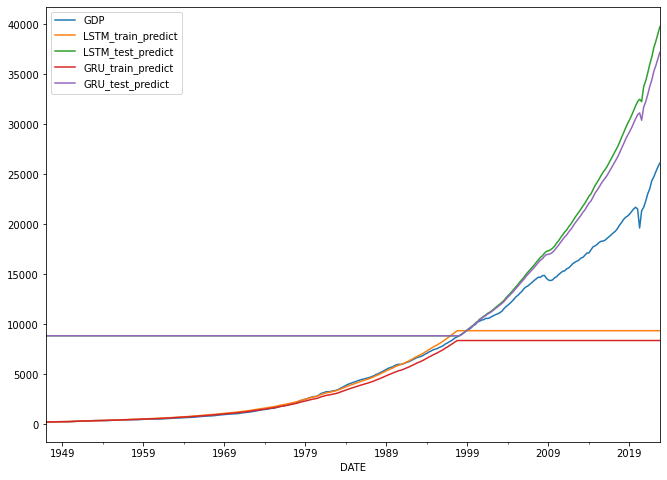

In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

dataset['GRU_train_predict'] = 1
dataset['GRU_test_predict'] = 1
dataset.loc[1:train_points+1, 'GRU_train_predict'] = 1+scaler.inverse_transform(y_train_pred)
dataset.loc[train_points+2:, 'GRU_test_predict'] = 1+scaler.inverse_transform(y_test_pred)

dataset['GRU_train_predict'] = dataset.iloc[0]['GDP']*dataset['GRU_train_predict'].cumprod()
dataset['GRU_test_predict'] = dataset.iloc[train_points+1]['GDP']*dataset['GRU_test_predict'].cumprod()
dataset[['GDP', #'RNN_train_predict', 'RNN_test_predict', 
                'LSTM_train_predict', 'LSTM_test_predict', 
                #'LSTM3_train_predict', 'LSTM3_test_predict',
                'GRU_train_predict', 'GRU_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

# Thank you
## Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">MUHAMMAD BILAL</a>